### LINEAR REGRESSION MODEL

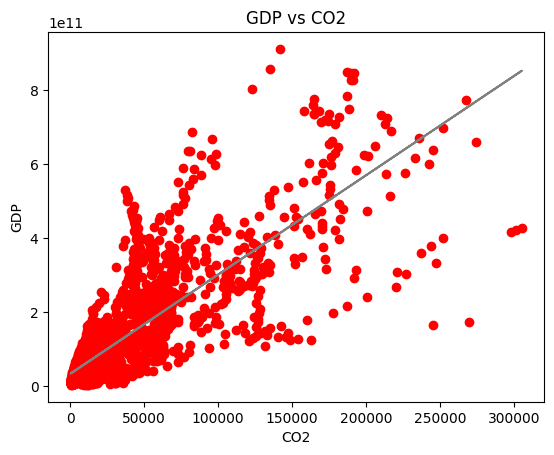

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('dataset/cleaned_data.csv', sep=";")

features  = data[['co2']]
dependent = data[['gdp']]

# split the data into training and test data
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent, test_size=0.2, random_state=0)

linear_regression = LinearRegression()

linear_regression.fit(features_train, dependent_train)

prediction = linear_regression.predict(features_test)

plt.scatter(features_train, dependent_train, color = 'red')
plt.plot(features_train, linear_regression.predict(features_train), color='grey')
plt.title('GDP vs CO2')

plt.xlabel('CO2')
plt.ylabel('GDP')

plt.show()

### KNN Regression

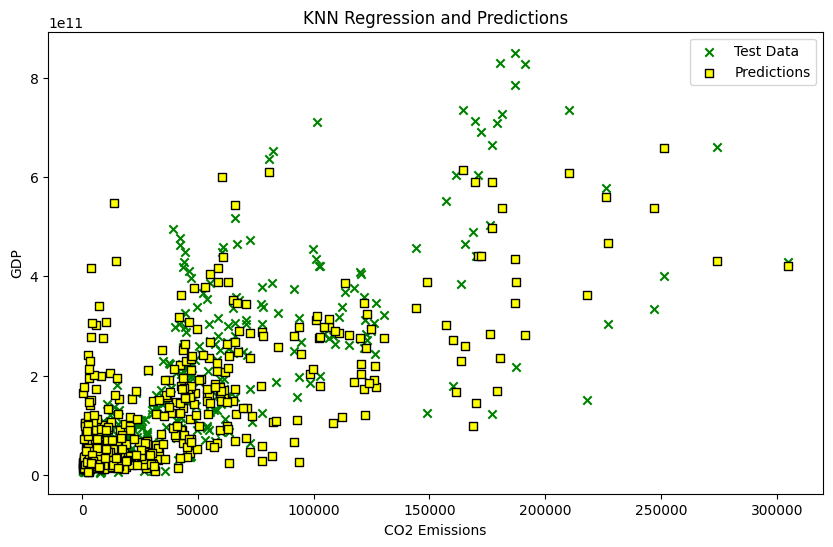

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
features = data[['co2', 'population']]
dependent = data['gdp']

# Split the data into training and testing sets
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent, test_size=0.2, random_state=42)

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model
knn.fit(features_train, dependent_train)

# Predict using the model
predictions = knn.predict(features_test)

# Visualize the KNN and predictions
plt.figure(figsize=(10, 6))

# Plot the test data
plt.scatter(features_test['co2'], dependent_test, c='green', marker='x', label='Test Data')

# Plot the predictions
plt.scatter(features_test['co2'], predictions, c='yellow', marker='s', edgecolors='black', label='Predictions')

plt.xlabel('CO2 Emissions')
plt.ylabel('GDP')
plt.title('KNN Regression and Predictions')
plt.legend()
plt.show()

### KNN Neighbors

Accuracy: 0.43653846153846154
Classification Report:
                               precision    recall  f1-score   support

        High-income countries       0.57      0.56      0.57       158
         Low-income countries       0.44      0.58      0.50       121
Lower-middle-income countries       0.34      0.41      0.37       139
Upper-middle-income countries       0.28      0.11      0.16       102

                     accuracy                           0.44       520
                    macro avg       0.41      0.41      0.40       520
                 weighted avg       0.42      0.44      0.42       520



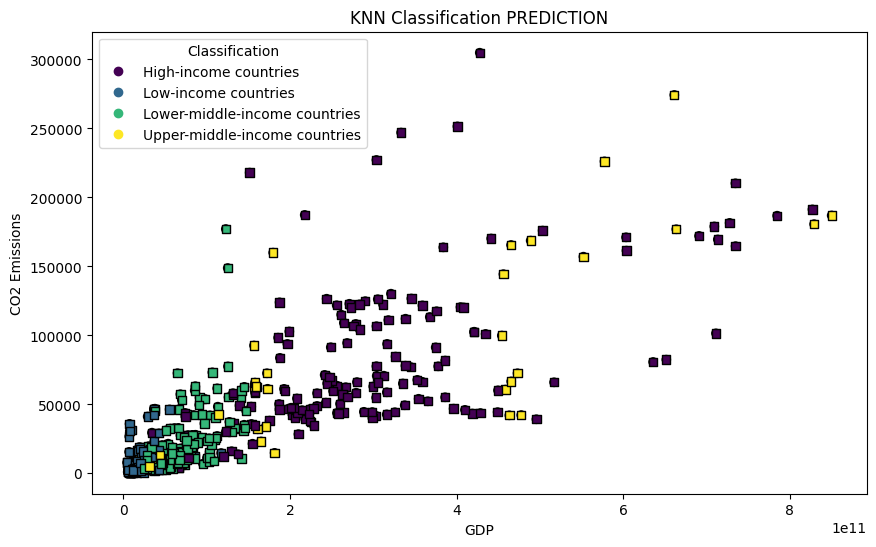

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
features = data[['gdp', 'co2', 'population']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)

# Split the data into training and testing sets
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

# Fit the model
knn.fit(features_train, dependent_train)

# Predict using the model
predictions = knn.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(dependent_test, predictions)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(dependent_test, predictions, target_names=label_encoder.classes_))


# Visualize the KNN and predictions
plt.figure(figsize=(10, 6))

# Plot the test data
scatter = plt.scatter(features_test['gdp'], features_test['co2'], c=dependent_test, edgecolors='black', marker='o', cmap='viridis')

# Plot the predictions
plt.scatter(features_test['gdp'], features_test['co2'], c=predictions, marker='s', edgecolors='black')

plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title('KNN Classification PREDICTION')
plt.legend(scatter.legend_elements()[0], label_encoder.classes_, title='Classification')
plt.show()

### DECISION TREE

Accuracy: 0.9076923076923077
Classification Report:
                               precision    recall  f1-score   support

        High-income countries       0.97      0.99      0.98       158
         Low-income countries       0.92      0.89      0.91       121
Lower-middle-income countries       0.85      0.86      0.85       139
Upper-middle-income countries       0.88      0.86      0.87       102

                     accuracy                           0.91       520
                    macro avg       0.90      0.90      0.90       520
                 weighted avg       0.91      0.91      0.91       520



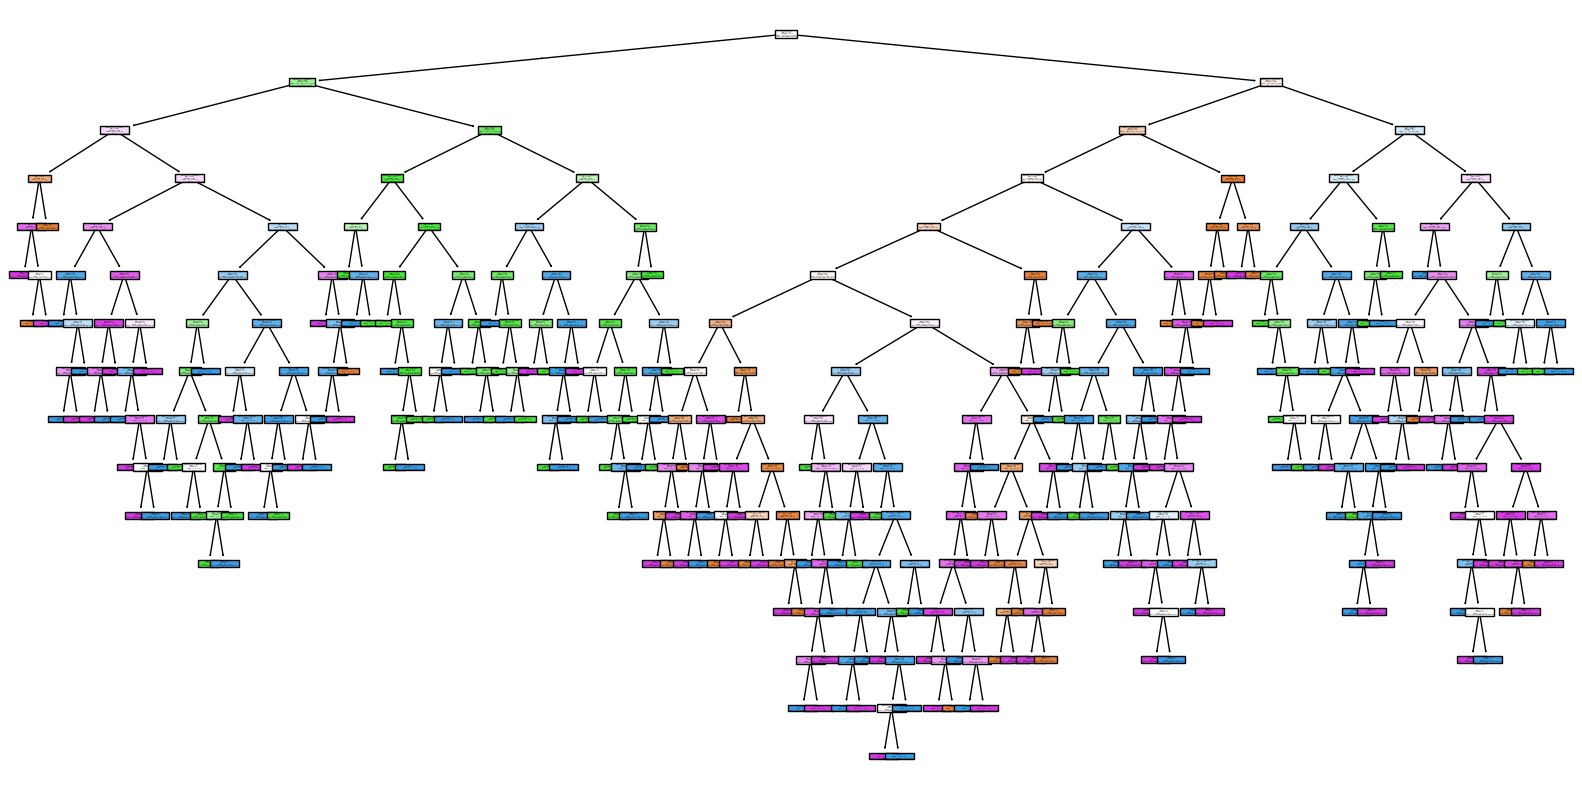

In [5]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
features = data[['gdp', 'co2', 'population']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)

# Split the data into training and testing sets
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

# Initialize and fit the DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(features_train, dependent_train)

# Make predictions on the test data
predictions = dtree.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(dependent_test, predictions)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(dependent_test, predictions, target_names=label_encoder.classes_))

# Plot the decision tree
plt.figure(figsize=(20, 10))

tree.plot_tree(dtree, feature_names=features.columns, class_names=label_encoder.classes_, filled=True)
plt.show()